# Slopes and Limits

We wish to find the slope of $\sin(x)$ at $x=0$. Recalling that slope is merely rise over run we imagine a small number $h>0$ and so find a run of $h-0$ and rise of $\sin(h)-\sin(0)=\sin(h)$. As the slope, $\sin(h)/h$, depends on $h$ we ask what happens as we let our arbitrary $h$ tend to 0. In mathematical terms we ask for

$$
  \lim_{h\to 0} \frac{\sin(h)}{h}
$$

Let us first use python to explore this limit visually and numerically.

In [3]:
import numpy as np
h = 0
print(np.sin(h)/h)   # naive substitution does not work, we must be more clever

nan


<ipython-input-3-bb77e313e1bb>:3: RuntimeWarning: invalid value encountered in double_scalars
  print(np.sin(h)/h)   # naive substitution does not work, we must be more clever


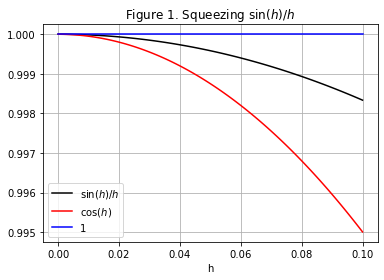

In [2]:
import numpy as np
import matplotlib.pyplot as plt

h = np.linspace(0.000001, 0.1, 100)  # start h values just above 0

plt.plot(h, np.sin(h)/h,'k')

plt.plot(h, np.cos(h), 'r')

plt.plot([0, .1], [1, 1], 'b')

plt.grid('on')
plt.xlabel('h')
plt.legend(['$\sin(h)/h$', '$\cos(h)$', '1'])
plt.title('Figure 1. Squeezing $\sin(h)/h$');

This then suggests of course that $\sin(h)/h\approx 1$ when $h$ is close to 0. To explore this with numbers we find

In [6]:
h = 0.1
print(np.sin(h)/h)
h = 0.01
print(np.sin(h)/h)
h = 0.001
print(np.sin(h)/h)

0.9983341664682815
0.9999833334166665
0.9999998333333416


This is all very strong evidence for the claim that

$$
  \lim_{h\to 0} \frac{\sin(h)}{h} = 1
$$

Nonetheless we remain troubled by the fact that we cannot simply evaluate $\sin(0)/0$. In order to get to that subtle limit we will use our knowledge of trigonometry to set up the squeeze play

$$
  \boxed{\cos(h) \le \frac{\sin(h)}{h} \le 1}
$$

This will get us out of our bind, for undoubtedly

$$
  \lim_{h\to 0}\cos(h) = 1
$$

and so our subtle slope, $\sin(h)/h$, is squeezed between 1 and 1 in the limit and so can be none other than 1.

Our squeeze play is really two separate inequalities

$$
  \boxed{h\cos(h) \le \sin(h)} \hskip 0.25in\hbox{and}\hskip 0.25in \boxed{\sin(h) \le h}.
$$

We will establish these one at a time, starting with the latter. 

We begin with a wedge of angle $h$ and radius 1 and so arc length $h/1=h$. We drop a green vertical and note that is has length $\sin(h)$ (since our hypotenuse has length 1).

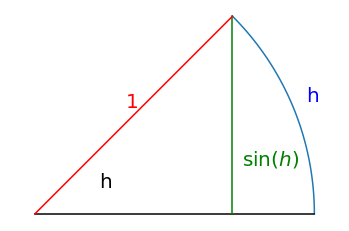

In [3]:
h = np.pi/4
t = np.linspace(0, h, 100)   
plt.plot(np.cos(t), np.sin(t))

plt.plot([0, 1],[0, 0],'k') 
plt.plot([np.cos(h), np.cos(h)], [0, np.sin(h)], 'g')
plt.text(1.05*np.cos(h), 0.25*np.sin(h),'$\\sin(h)$',fontsize=20,color='g')
plt.text(0.5*np.cos(1.1*h), 0.5*np.sin(1.1*h),'1',fontsize=20, color='r')
plt.plot([0, np.cos(h)],[0, np.sin(h)],'r')
plt.text(1.05*np.cos(h/2), 1.05*np.sin(h/2),'h',fontsize=20,color='b')
plt.text(0.25*np.cos(h/2), 0.25*np.sin(h/2),'h',fontsize=20)
#plt.text(0,0.65,'Figure 1',fontsize=20)
plt.axis('off')
plt.axis('equal');

The blue arc sure looks longer than the green vertical. To clinch that surmise we need only join our figure with its reflection over the x-axis,

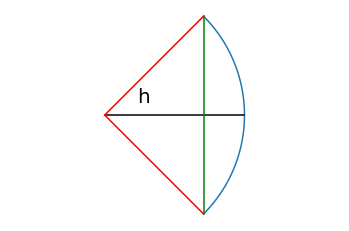

In [4]:
t = np.linspace(-h, h, 100)   
plt.plot(np.cos(t), np.sin(t))

plt.plot([0, 1],[0, 0],'k') 
plt.plot([np.cos(h), np.cos(h)], [np.sin(-h), np.sin(h)], 'g')

plt.plot([0, np.cos(h)],[0, np.sin(h)],'r')
plt.plot([0, np.cos(h)],[0, np.sin(-h)],'r')

plt.text(0.25*np.cos(h/2), 0.25*np.sin(h/2),'h',fontsize=20)

plt.axis('off')
plt.axis('equal');

As we have simply doubled the original lengths, the new blue arc has length $2h$ while the new green vertical has length $2\sin(h)$. Finally, as the shortest distance between two points is straight, we have **proven** that

$$
  \sin(h) \le h.
$$

This completes the first half of our squeeze play. We did this by comparing lengths. We will achieve the other side of our squeeze by comparing areas. We begin with the same wedge, but instead of dropping a green vertical on the inside we drop it on the outside, and so give it length $\tan(h)$.

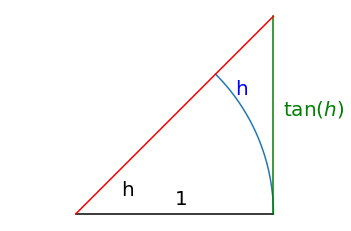

In [5]:
t = np.linspace(0, h, 100)   
plt.plot(np.cos(t), np.sin(t))

plt.plot([0, 1],[0, 0],'k') 
plt.plot([1, 1], [0, np.tan(h)], 'g')
plt.text(1.05, 0.5*np.tan(h),'$\\tan(h)$',fontsize=20,color='g')
plt.text(0.5, 0.05,'1',fontsize=20)
plt.plot([0, 1],[0, np.tan(h)],'r')
plt.text(np.cos(h)+.1, np.sin(h)-.1,'h',fontsize=20, color='b')
plt.text(0.25*np.cos(h/2), 0.25*np.sin(h/2),'h',fontsize=20)
#plt.text(0,0.65,'Figure 1',fontsize=20)
plt.axis('off')
plt.axis('equal');

Let us now compute and compare the areas of the wedge and the triangle. The area of a triangle is half the product of base and height. In our case, that is

$$
  \tan(h)/2.
$$

The area of wedge of angle $h$ is $h/(2\pi)$ times the area of the full circle. In our case, that is

$$
  h/2.
$$

As the triangle includes the wedge, the triangle must have the greater area, i.e.,

$$
  h \le \tan(h).
$$

As $\tan(h)=\sin(h)/\cos(h)$ we find

$$
  h\cos(h) \le \sin(h),
$$

the first of our squeeze inequalities. We have now proven that the limit of the slope of $\sin$ at 0  is

$$
  \boxed{\lim_{h\to 0}\frac{\sin(h)}{h} = 1}
$$

From here we may deduce many other related, and important, limits. For example, you may amass numerical and
graphical evidence in support of the belief that

$$
  \lim_{h\to 0}\frac{1-\cos(h)}{h} = 0.
$$

To prove it, using our last box, let us multiply our patient by the innocent looking $1+\cos(h)$ and note that

$$
  (1+\cos(h))\frac{1-\cos(h)}{h} = \frac{1-\cos^2(h)}{h} = \frac{\sin^2(h)}{h} = \sin(h)\frac{\sin(h)}{h} \to 0\cdot 1 = 0.
$$

**Homework.** Exercise 1. Plot each of these functions for small $h$ and state their limits as $h\to 0$.

$$
  (a)\hskip 2in \frac{\sin^2(h)}{h}
$$

$$
  (b)\hskip 2in \frac{\sin(5h)}{5h}
$$

$$
  (c)\hskip 2in \frac{\sin(5h)}{h}
$$

$$
  (d)\hskip 2in \frac{\sin(h)}{5h}
$$

Exercise 2. Plot each of these functions for small $h$ and state their limits as $h\to 0$.

$$
  (a)\hskip 2in \frac{1-\cos(h)}{h^2}
$$

$$
  (b)\hskip 2in \frac{1-\cos^2(h)}{h^2}
$$

$$
  (c)\hskip 2in \frac{1-\cos^2(h)}{\sin^2(h)}
$$

$$
  (d)\hskip 2in \frac{1-\cos(2h)}{h}
$$


